In [ ]:
from transformers import pipeline
image_path = "https://farm5.staticflickr.com/4007/4322154488_997e69e4cf_z.jpg"
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:90: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


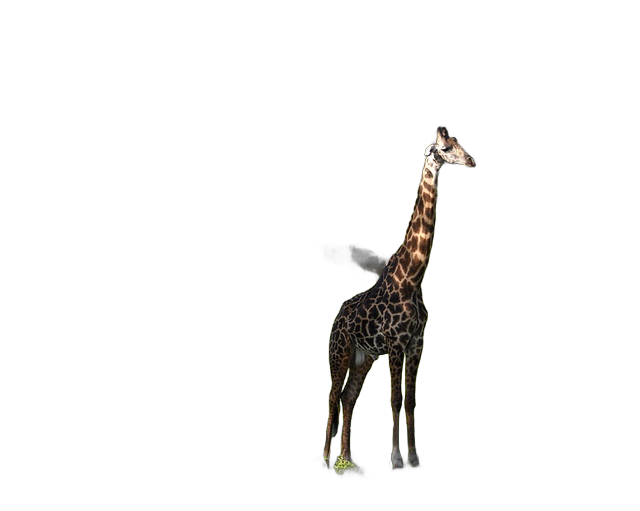

In [ ]:
pillow_image

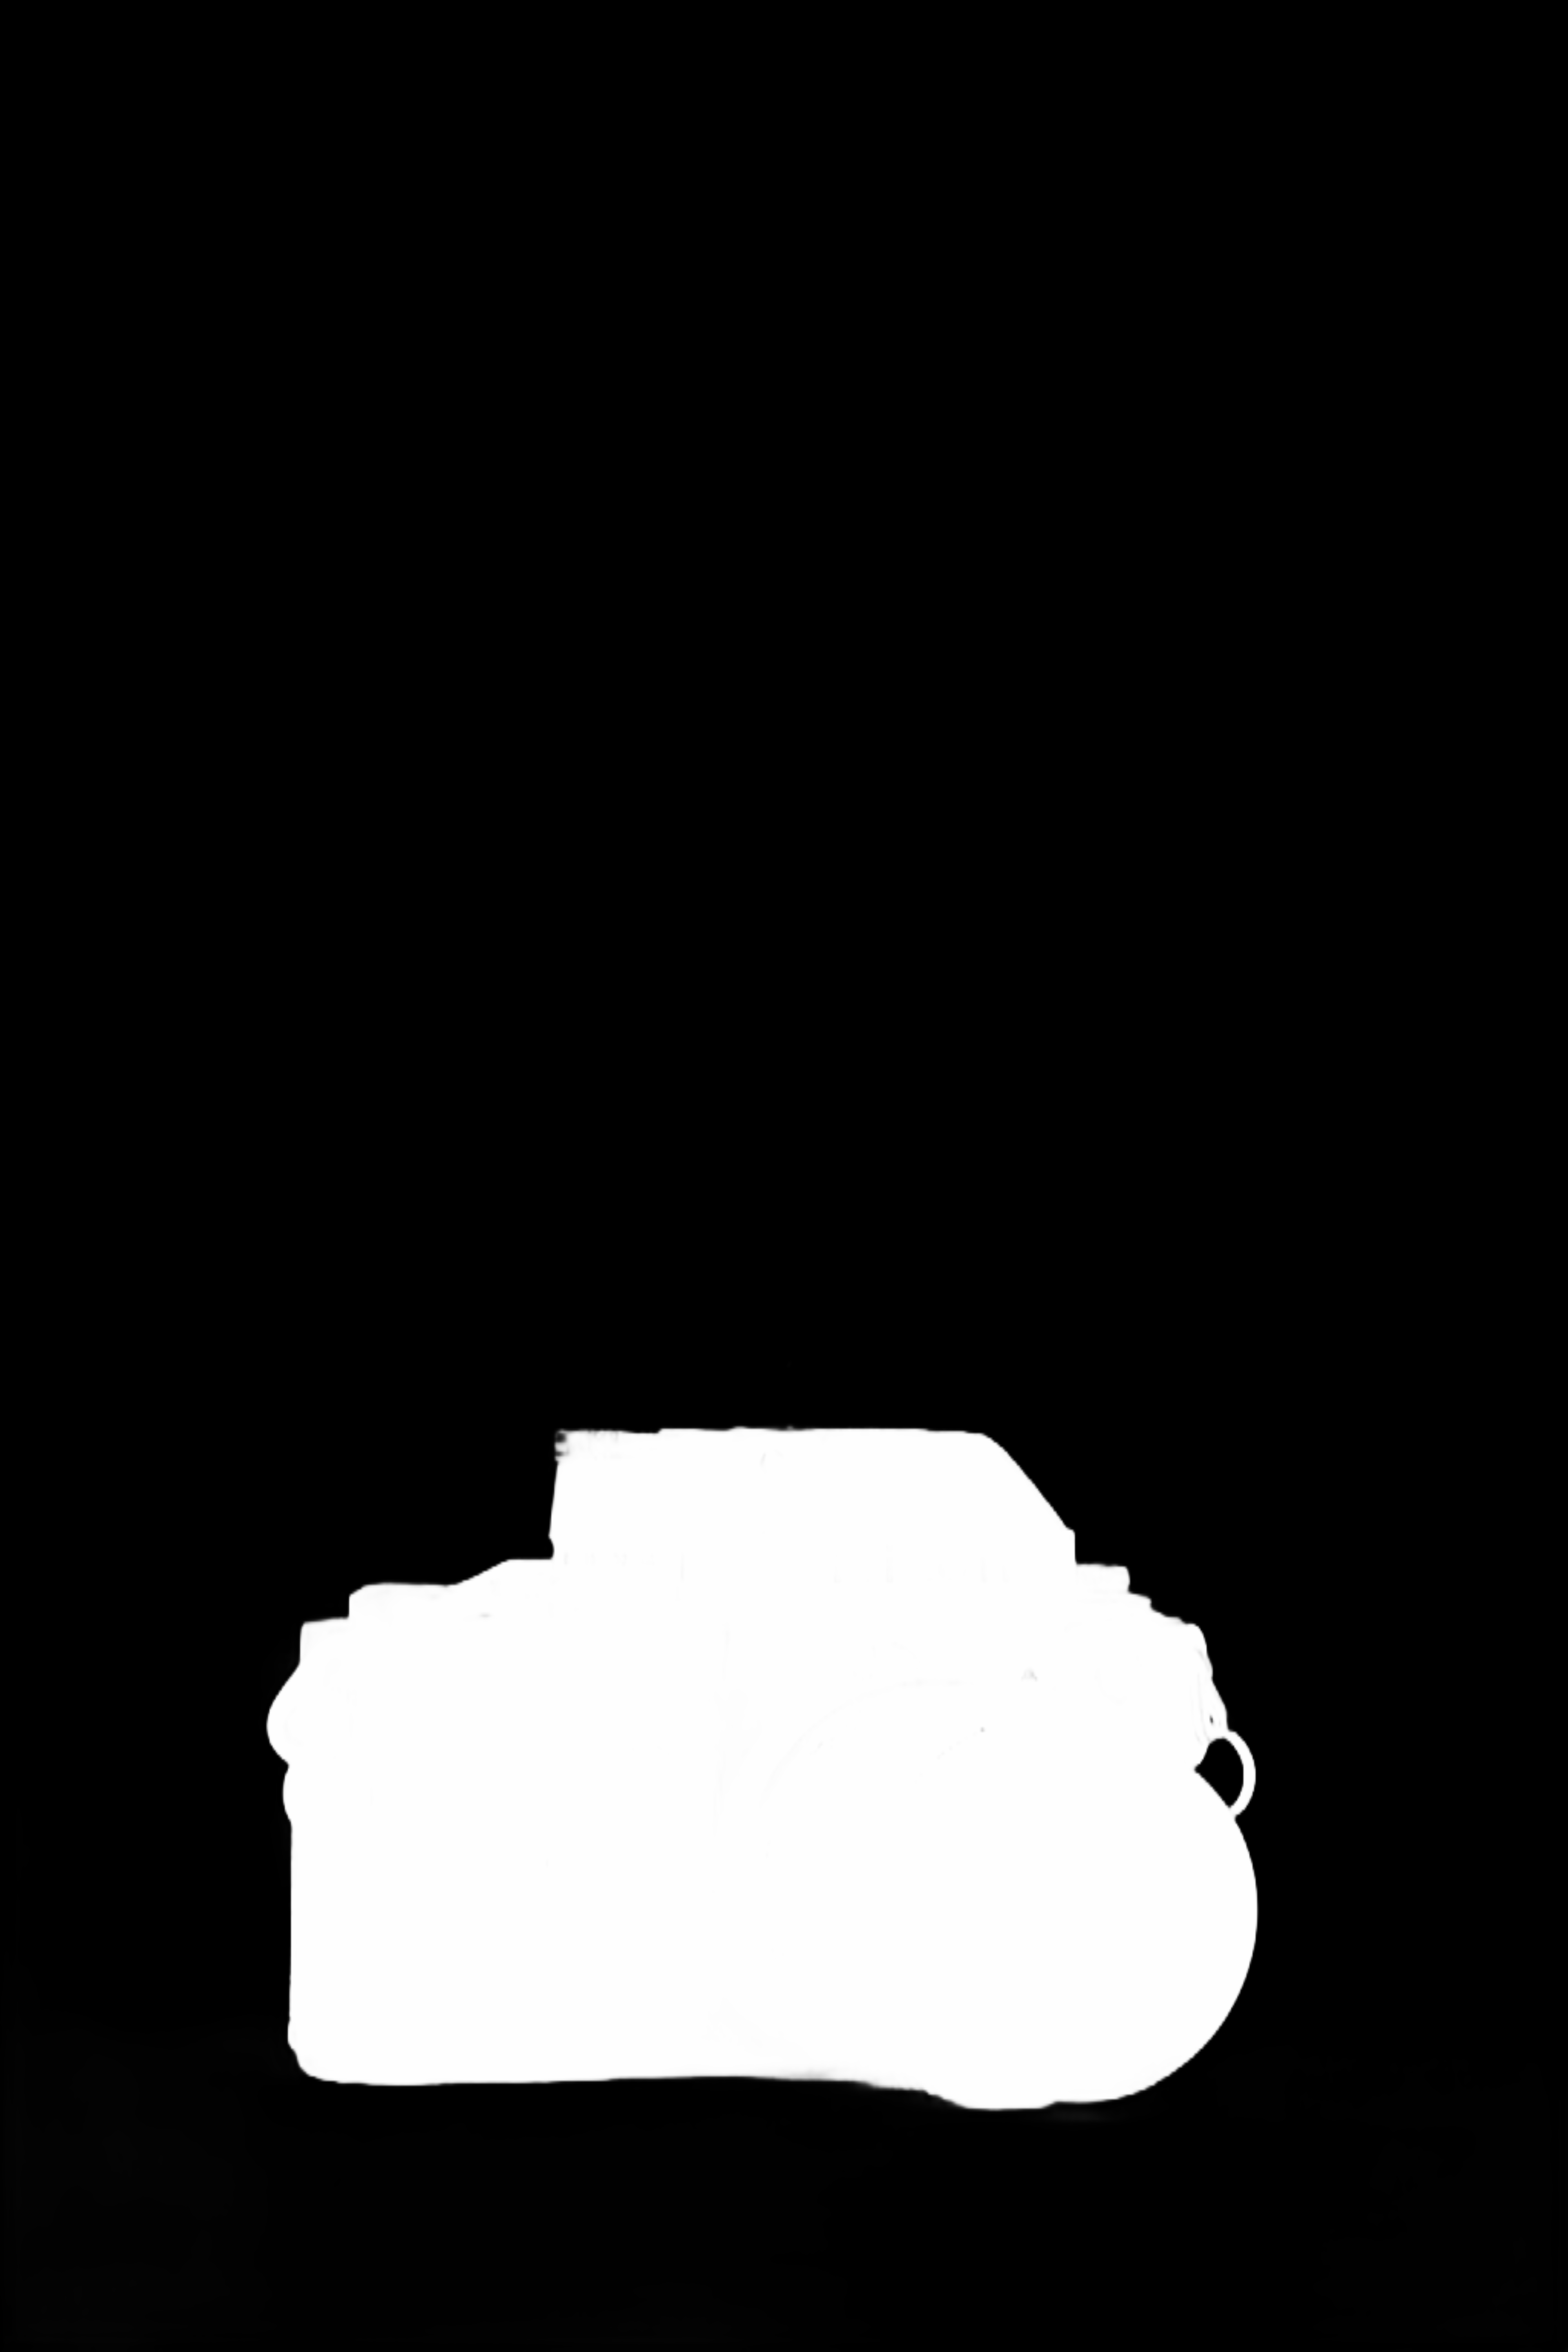

In [ ]:
image_path = '/content/camera_fotografica.jpg'
pipe = pipeline('image-segmentation', model='briaai/RMBG-1.4', trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image
pillow_mask

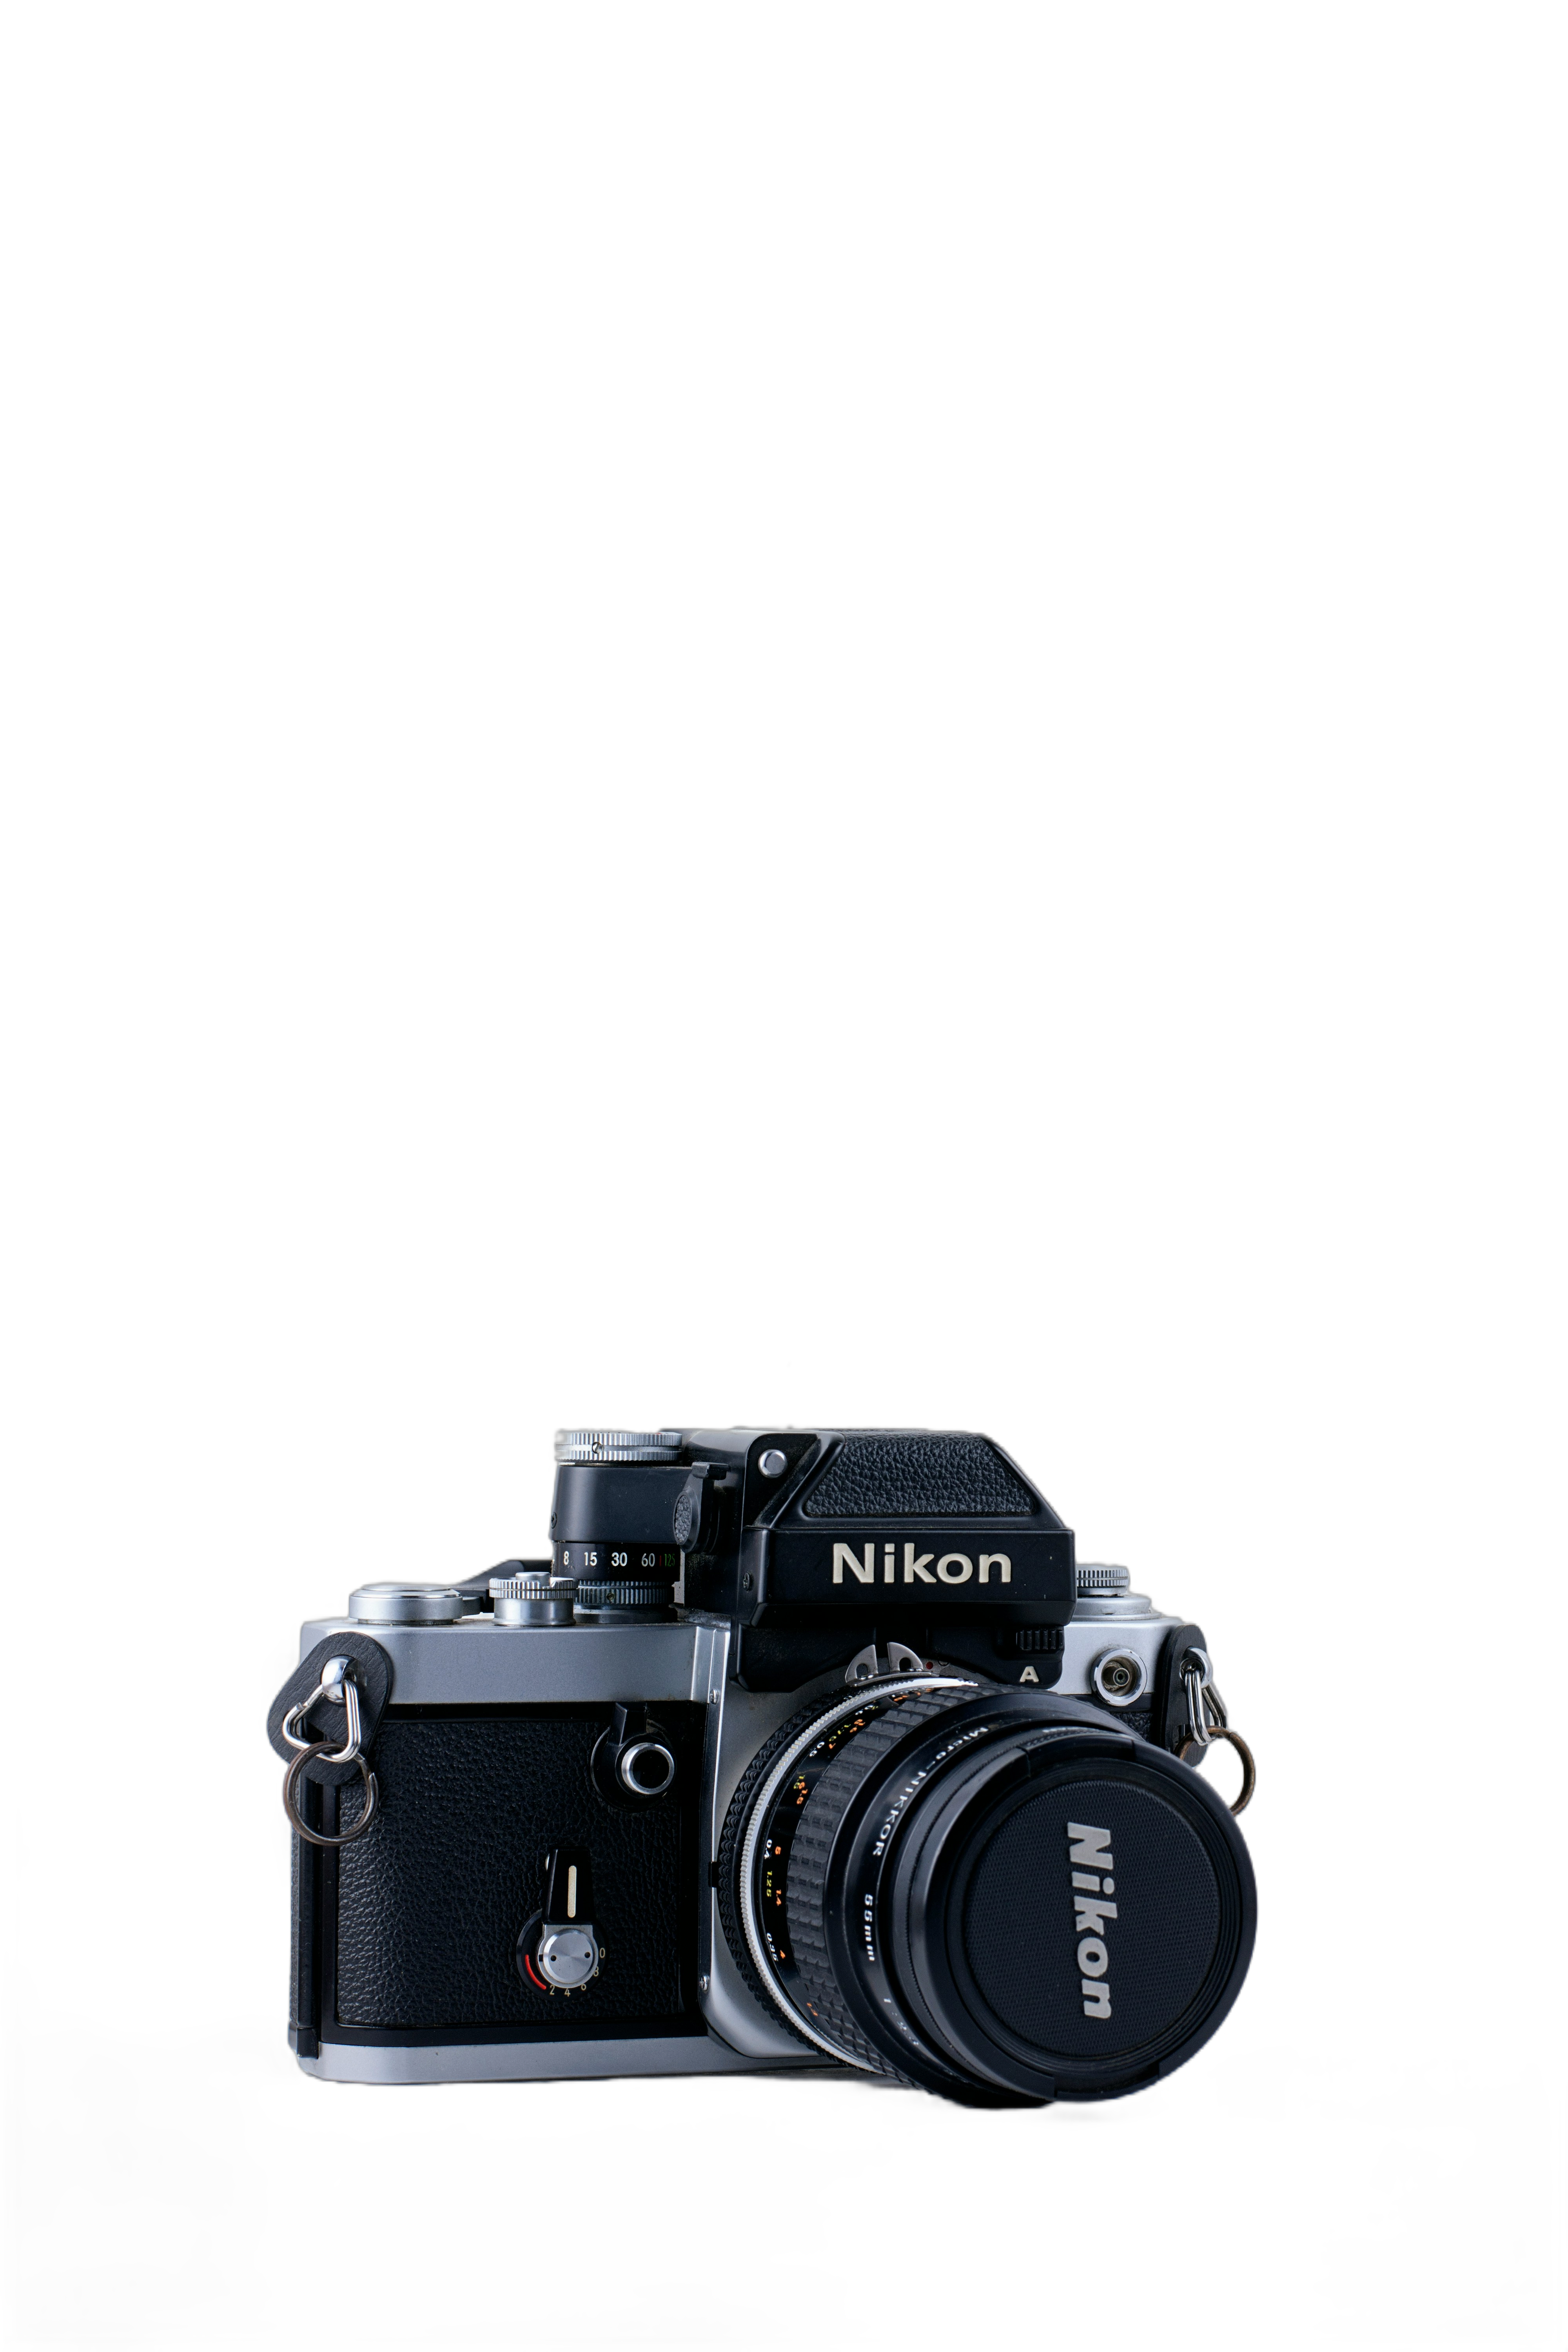

In [ ]:
pillow_image

Criando uma Interface (automatizar com a biblioteca Gradio):

In [ ]:
pip install gradio

In [ ]:
import gradio as gr
from transformers import pipeline
from PIL import Image

In [ ]:
# Função para remover o background da imagem
def remove_background(image):
  pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)

  # Obter a máscara da imagem
  pillow_mask = pipe(image, return_mask=True)

  # Aplicar máscara na imagem original
  pillow_image = pipe(image)
  return pillow_image

In [ ]:
# Criar uma interface Gradio
app = gr.Interface(
  fn=remove_background,
  inputs=gr.components.Image(type="pil"),
  outputs=gr.components.Image(type="pil", format="png"), # Especificar saída como PNG
  title="Remoção de Background de Imagens",
  description="Envie uma imagem e veja o background sendo removido automaticamente. A imagem resultante será no formato PNG."
)
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a447b8b640317bd7f5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
